In [ ]:
# Import Numpy & PyTorch
import numpy as np
import torch



A tensor is a number, vector, matrix or any n-dimensional array.

## Problem Statement

We'll create a model that predicts crop yeilds for apples (*target variable*) by looking at the average temperature, rainfall and humidity (*input variables or features*) in different regions. 

Here's the training data:

>Temp | Rain | Humidity | Prediction
>--- | --- | --- | ---
> 73 | 67 | 43 | 56
> 91 | 88 | 64 | 81
> 87 | 134 | 58 | 119
> 102 | 43 | 37 | 22
> 69 | 96 | 70 | 103

In a **linear regression** model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yeild_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
```

It means that the yield of apples is a linear or planar function of the temperature, rainfall & humidity.



**Our objective**: Find a suitable set of *weights* and *biases* using the training data, to make accurate predictions.

## Training Data
The training data can be represented using 2 matrices (inputs and targets), each with one row per observation and one column for variable.



In [ ]:

# Input (temp, rainfall, humidity)
X = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Target (apples)
Y = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103]], dtype='float32')



Before we build a model, we need to convert inputs and targets to PyTorch tensors.

## Linear Regression Model (from scratch)

The *weights* and *biases* can also be represented as matrices, initialized with random values. The first row of `w` and the first element of `b` are use to predict the first target variable i.e. yield for apples, and similarly the second for oranges.

The *model* is simply a function that performs a matrix multiplication of the input `x` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$



In [ ]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
#normalizing the input
X = (X-mu) / sigma
X = np.hstack((np.ones((Y.size,1)),X))
print(X.shape)



(5, 4)


In [13]:

# Weights and biases

rg = np.random.default_rng(111)
w = rg.random((1, 4))
print(w)


[[0.15366136 0.1693033  0.50596431 0.65811887]]


Because we've started with random weights and biases, the model does not perform a good job of predicting the target varaibles.

## Loss Function

We can compare the predictions with the actual targets, using the following method: 
* Calculate the difference between the two matrices (`preds` and `targets`).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the **mean squared error** (MSE).



In [14]:

# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

# Define the model
def model(x,w):
    return x @ w.T


In [15]:

# Compute error
preds = model(X,w)
cost_initial = mse(preds, Y)
print("before regression, cost is : ", cost_initial)



before regression, cost is :  6902.067408005436


## Compute Gradients


In [16]:

# Compute gradients

def gradient_descent(X, y, w, learning_rate, n_iters):
    history = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, w)
        diff = h - y
        delta = (learning_rate / Y.size) * (X.T@diff)
        new_w = w - delta.T
        w = new_w
        history[i] = mse(h, y)
    return (history, w)



A key insight from calculus is that the gradient indicates the rate of change of the loss, or the slope of the loss function w.r.t. the weights and biases. 

* If a gradient element is **postive**, 
    * **increasing** the element's value slightly will **increase** the loss.
    * **decreasing** the element's value slightly will **decrease** the loss.




* If a gradient element is **negative**,
    * **increasing** the element's value slightly will **decrease** the loss.
    * **decreasing** the element's value slightly will **increase** the loss.
    


The increase or decrease is proportional to the value of the gradient.

## Adjust weights and biases using gradient descent

We'll reduce the loss and improve our model using the gradient descent algorithm, which has the following steps:

1. Generate predictions
2. Calculate the loss
3. Compute gradients w.r.t the weights and biases
4. Adjust the weights by subtracting a small quantity proportional to the gradient
5. Reset the gradients to zero

## Train for multiple iteration

To reduce the loss further, we repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch.


In [17]:

import matplotlib.pyplot as plt
n_iters = 400
learning_rate = 0.01

initial_cost = mse(model(X, w),Y)

print("Initial cost is: ", initial_cost, "\n")

(history, optimal_params) = gradient_descent(X, Y, w, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", history[-1])



Initial cost is:  6902.067408005436 

Optimal parameters are: 
 [[74.83492646 -4.39332885 23.28447044 11.23419769]] 

Final cost is:  [6.5811313]


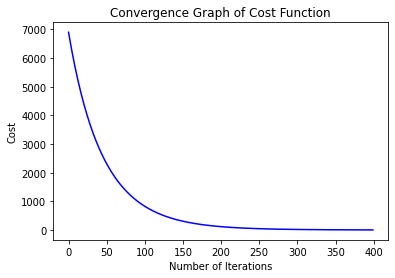

In [18]:

import matplotlib.pyplot as plt

plt.plot(range(len(history)), history, 'b')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()


In [19]:

# Calculate error
preds = model(X, optimal_params)
cost_final = mse(preds, Y)

# Print predictions
print("Prediction:\n",preds)

# Comparing predicted with targets
print("\nTargets:\n", Y)

Prediction:
 [[ 54.48998785]
 [ 82.89769221]
 [114.20909011]
 [ 20.14323763]
 [102.43462332]]

Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [20]:

print("Cost after linear regression: ", cost_final)
print("Cost reduction : {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression:  6.520281464468852
Cost reduction : 99.90553147225269 %
